In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
# import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_a = pd.read_csv("../datasets/1_india_disability.csv")

In [30]:
df_a.head(5)

,State Code,Area Name,Total/ Rural/Urban,Disability,Age-group,Total disabled population - Persons,Total disabled population - Males,Total disabled population - Females,Main worker - Persons,Main worker - Males,Main worker - Females,Non-worker - Persons,Non-worker - Males,Non-worker - Females
0,0,INDIA,Total,Total,Total,26814994,14988593,11826401,6982009,5464857,1517152,17070608,7915768,9154840
1,0,INDIA,Total,Total,0-14,5572336,3073214,2499122,100779,61870,38909,5344297,2942702,2401595
2,0,INDIA,Total,Total,15-59,15728243,9125226,6603017,5808809,4559220,1249589,7785245,3317990,4467255
3,0,INDIA,Total,Total,60+,5376619,2713995,2662624,1036384,816764,219620,3854887,1614909,2239978
4,0,INDIA,Total,Total,Age not stated,137796,76158,61638,36037,27003,9034,86179,40167,46012


In [32]:
# removing india and total as they represent they sum of the values

filtered_data = df_a[(df_a['Disability'] != 'Total') & (df_a['Area Name'] != 'INDIA') & (df_a["Age-group"]!="Total")]


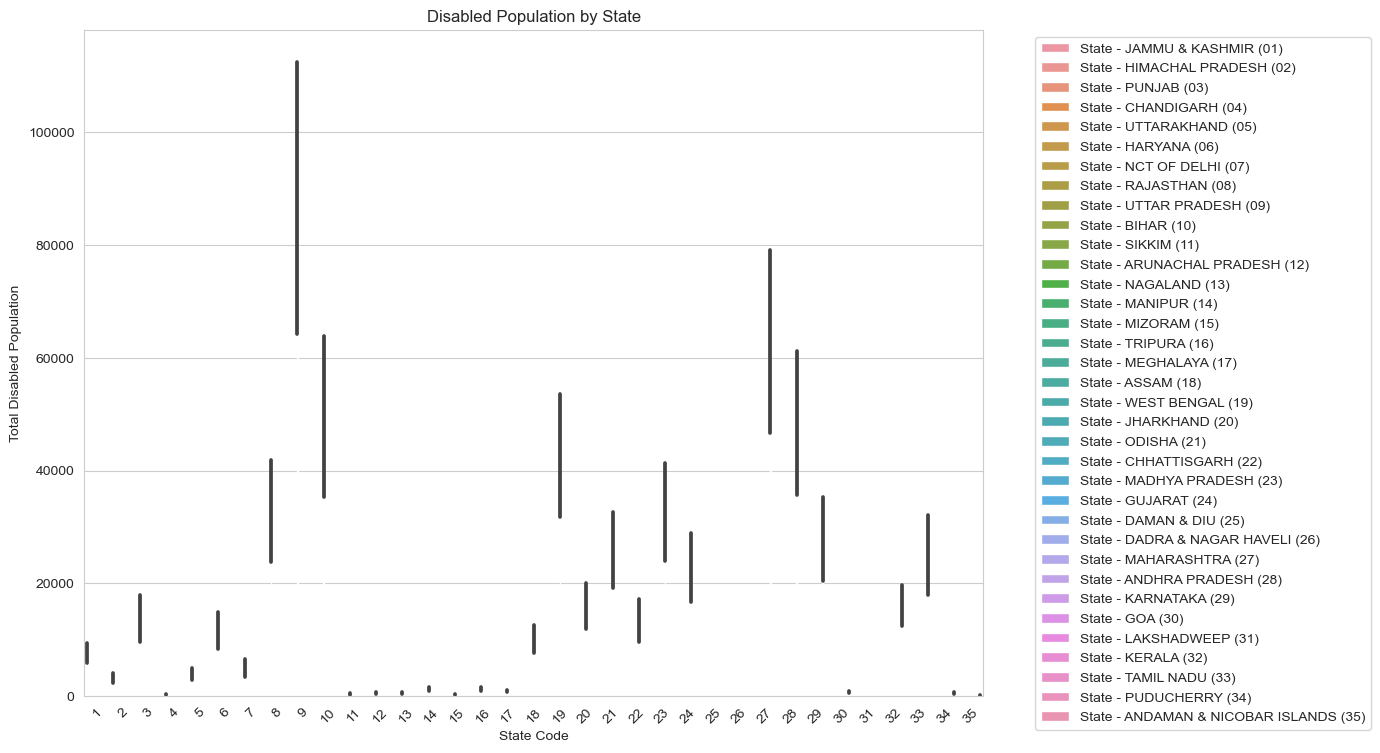

In [33]:
plt.figure(figsize=(14, 8))  # Adjust figure size

# Create the bar plot
sns.barplot(x='State Code', y='Total disabled population - Persons', hue='Area Name', data=filtered_data)

plt.title('Disabled Population by State')
plt.xlabel('State Code')
plt.ylabel('Total Disabled Population')
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  
plt.show()



In [34]:
total_disabled_population = df_a[(df_a["Total/ Rural/Urban"]=="Total") & (df_a["Area Name"]=="INDIA") & (df_a["Age-group"]=="Total") & (df_a["Disability"]!="Total")]
rural_disabled_population = df_a[(df_a["Total/ Rural/Urban"]=="Rural") & (df_a["Area Name"]=="INDIA") & (df_a["Age-group"]=="Total")  & (df_a["Disability"]!="Total")]
urban_disabled_population = df_a[(df_a["Total/ Rural/Urban"]=="Urban") & (df_a["Area Name"]=="INDIA") & (df_a["Age-group"]=="Total") & (df_a["Disability"]!="Total")]

# total_disabled_population


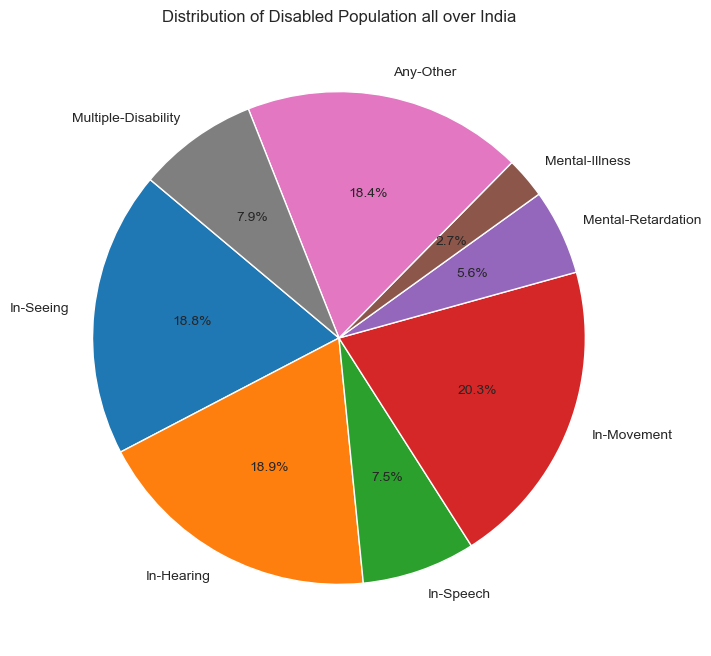

In [35]:
# Pie chart to visualize the proportion of disabled population in rural and urban areas
plt.figure(figsize=(8, 8))
plt.pie(total_disabled_population["Total disabled population - Persons"], labels=total_disabled_population["Disability"], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Disabled Population all over India')
plt.show()

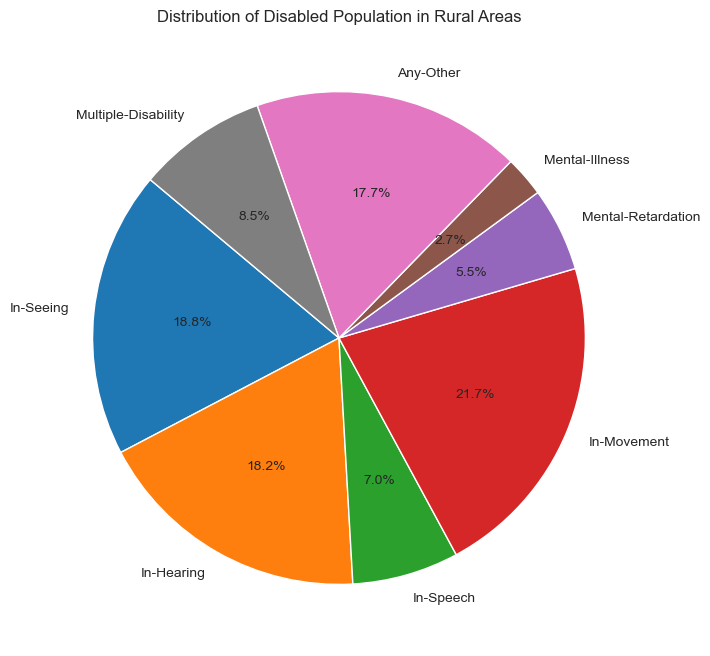

In [59]:
# Pie chart to visualize the proportion of disabled population in rural and urban areas
plt.figure(figsize=(8, 8))
plt.pie(rural_disabled_population["Total disabled population - Persons"], labels=rural_disabled_population["Disability"], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Disabled Population in Rural Areas')
plt.show()

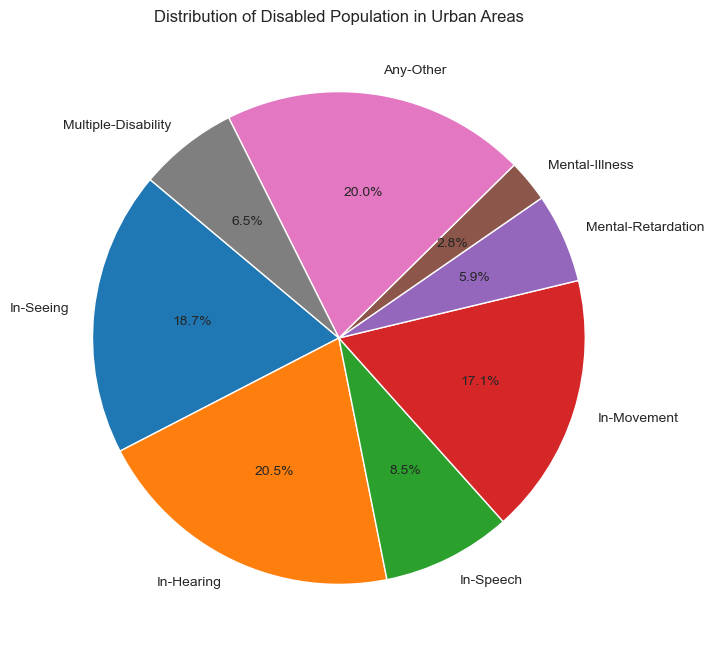

In [60]:
# Pie chart to visualize the proportion of disabled population in rural and urban areas
plt.figure(figsize=(8, 8))
plt.pie(urban_disabled_population["Total disabled population - Persons"], labels=urban_disabled_population["Disability"], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Disabled Population in Urban Areas')
plt.show()

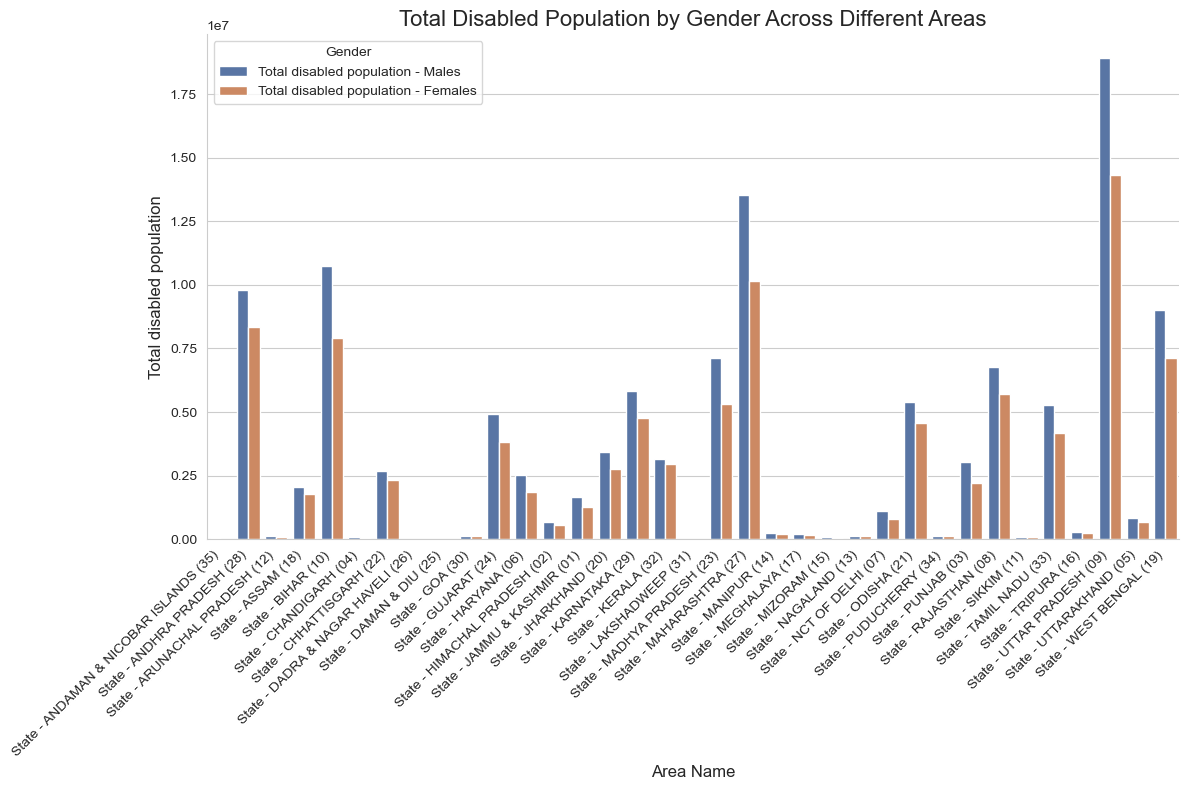

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your data is in a DataFrame named 'df'

# Filter data for specific columns
filtered_data = df_a[['Area Name', 'Total disabled population - Males', 'Total disabled population - Females']]

# Filter out rows where Area Name is not 'INDIA' and aggregate the sum of disabled population by area
filtered_data = filtered_data[filtered_data['Area Name'] != 'INDIA']
grouped_data = filtered_data.groupby('Area Name').sum().reset_index()

# Reshape the data for Seaborn's barplot
melted_data = grouped_data.melt(id_vars='Area Name', var_name='Gender', value_name='Total disabled population')

# Set a custom color palette
custom_palette = ["#4c72b0", "#dd8452"]

# Set a Seaborn style
sns.set_style("whitegrid")

# Plotting the grouped bar chart using Seaborn with adjusted styling
plt.figure(figsize=(12, 8))
sns.barplot(x='Area Name', y='Total disabled population', hue='Gender', data=melted_data, palette=custom_palette)
plt.title('Total Disabled Population by Gender Across Different Areas', fontsize=16)
plt.xlabel('Area Name', fontsize=12)
plt.ylabel('Total disabled population', fontsize=12)
plt.legend(title='Gender', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating x-axis labels for better readability
plt.yticks(fontsize=10)
plt.tight_layout()
sns.despine()
plt.show()

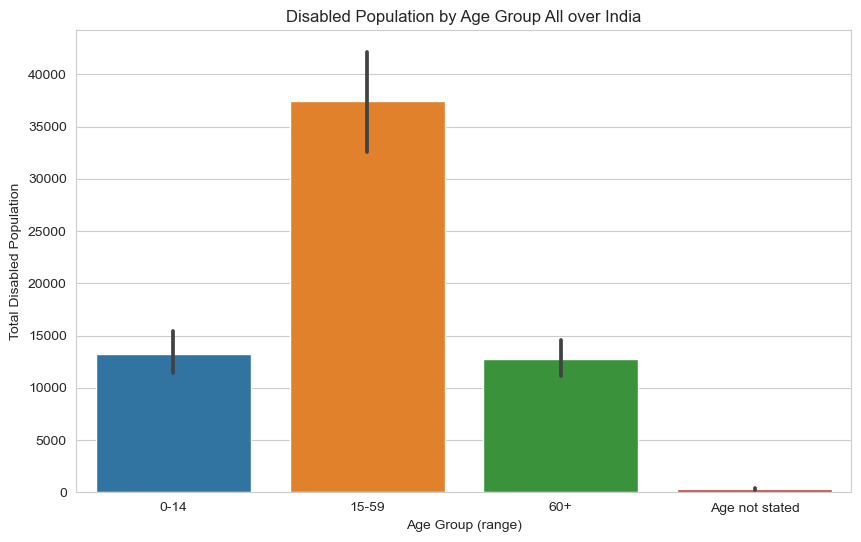

,Age-group,Total disabled population - Persons,Numeric Age
141,0-14,13456,0
142,15-59,32138,1
143,60+,20790,2
144,Age not stated,64,3
146,0-14,16482,0
...,...,...,...
4854,Age not stated,0,3
4856,0-14,60,0
4857,15-59,88,1
4858,60+,17,2


In [75]:

# Select relevant columns for analysis
data = filtered_data[['Age-group', 'Total disabled population - Persons']]

# Mapping age groups to numerical values
age_group_mapping = {
    '0-14': 0,
    '15-59': 1,
    '60+': 2,
    'Age not stated': 3
}

# Map 'Age-group' to numerical values
data['Numeric Age'] = data['Age-group'].map(age_group_mapping)
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Numeric Age', y='Total disabled population - Persons', data=data)
plt.title('Disabled Population by Age Group All over India')
plt.xlabel('Age Group (range)')
plt.ylabel('Total Disabled Population')
plt.xticks(ticks=[0, 1, 2, 3], labels=['0-14', '15-59', '60+', 'Age not stated'])  # Customize x-axis labels
plt.show()


data


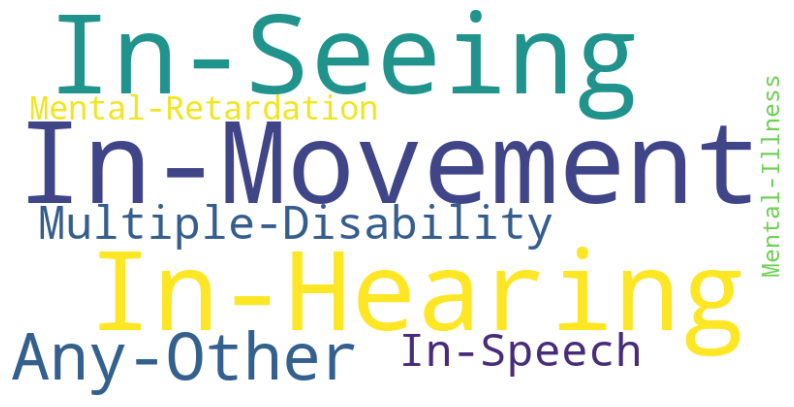

In [6]:
disability_counts = df_a.groupby('Disability')['Total disabled population - Persons'].sum().reset_index()

disability_counts = disability_counts[disability_counts["Disability"]!='Total']

disability_counts

disability_dict = {row['Disability']: row['Total disabled population - Persons'] for index, row in disability_counts.iterrows()}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(disability_dict)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

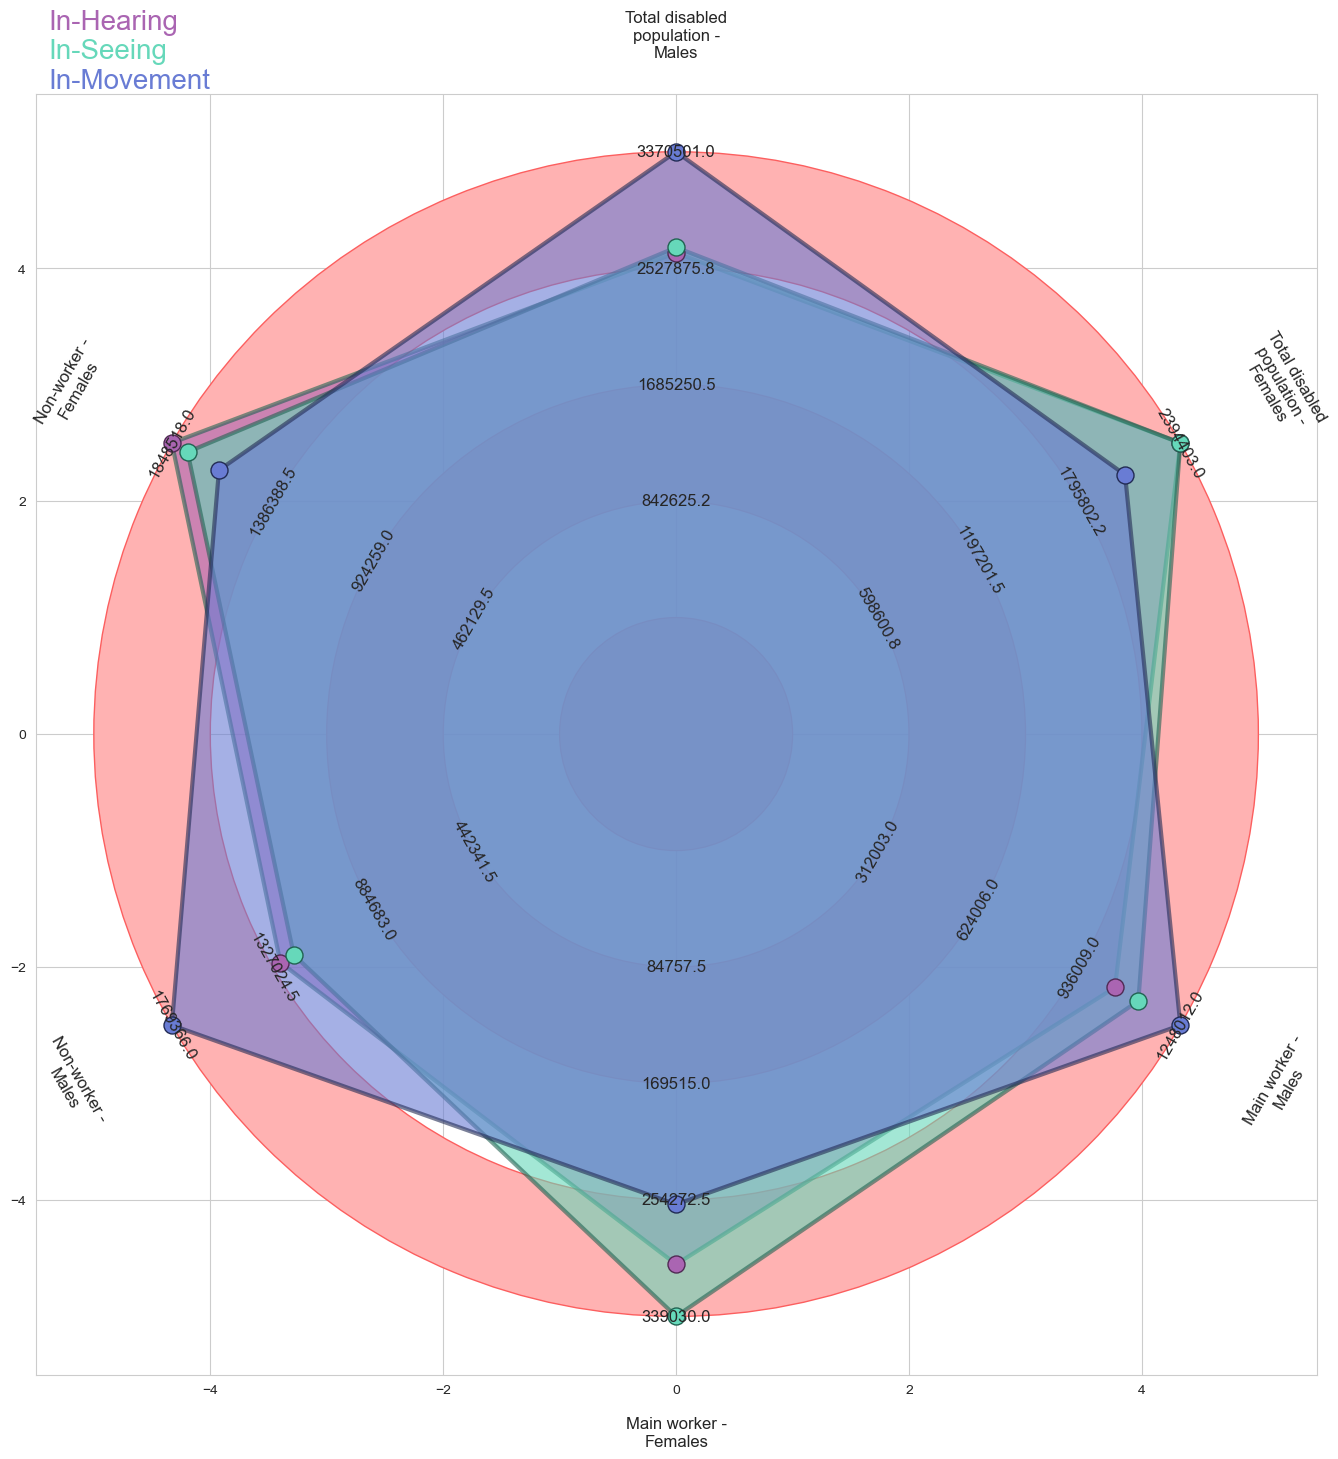

In [29]:
import numpy as np

data =  df_a[(df_a["Area Name"] == 'INDIA') & (df_a["Total/ Rural/Urban"] == 'Total') & (df_a["Disability"] != 'Total')]
data = data[data['Age-group']=='Total']


data = data[['Disability', 'Total disabled population - Males', 'Total disabled population - Females', 'Main worker - Males', 'Main worker - Females', 'Non-worker - Males', 'Non-worker - Females']]
# data = data[(data['Disability'] == 'In-Movement') & (data['Disability'] == 'In-Hearing')]
desired_disabilities = ['In-Hearing', 'In-Movement', 'In-Seeing']
data = data[data['Disability'].isin(desired_disabilities)]
data
params = list(data.columns)
params=params[1:]
params


values = data.drop('Disability', axis=1).to_numpy()

data
min_range = []
max_range = []
for row in values.transpose():
    max_range.append(row.max())
    min_range.append(0)


from mplsoccer import Radar, FontManager, grid
radar = Radar(params=params, min_range=min_range, max_range=max_range)


fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')

radar1, vertices1 = radar.draw_radar_solid(values[0], ax=axs['radar'],
                                           kwargs={'facecolor': '#aa65b2',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#216352',
                                                   'lw': 3})

radar2, vertices2 = radar.draw_radar_solid(values[1], ax=axs['radar'],
                                           kwargs={'facecolor': '#66d8ba',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#216352',
                                                   'lw': 3})

radar3, vertices3 = radar.draw_radar_solid(values[2], ax=axs['radar'],
                                           kwargs={'facecolor': '#697cd4',
                                                   'alpha': 0.6,
                                                   'edgecolor': '#222b54',
                                                   'lw': 3})


axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
           c='#aa65b2', edgecolors='#502a54', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
           c='#66d8ba', edgecolors='#216352', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices3[:, 0], vertices3[:, 1],
           c='#697cd4', edgecolors='#222b54', marker='o', s=150, zorder=2)

range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=12)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=12)


title1_text = axs['title'].text(0.01, 0.85, 'In-Hearing', fontsize=20, color='#aa65b2',
                                 ha='left', va='center')

title2_text = axs['title'].text(0.01, 0.50, 'In-Seeing', fontsize=20, ha='left', va='center', color='#66d8ba')
title2_text = axs['title'].text(0.01, 0.15, 'In-Movement', fontsize=20, ha='left', va='center', color='#697cd4')
